In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
PARKING_VIOL_CSV = "C:/Users/Ali/Desktop/TDI/Capstone/Parking_Violations_Issued_-_Fiscal_Year_2019.csv"
VIOL_CODES = "C:/Users/Ali/Desktop/TDI/Capstone/ParkingViolationCodes_Nov_2018.csv"

df = pd.read_csv(PARKING_VIOL_CSV)
codes_df = pd.read_csv(VIOL_CODES)
df.info()

C:\Users\Ali\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (17,18,20,22,23,29,30,31,32,36,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11467506 entries, 0 to 11467505
Data columns (total 43 columns):
Summons Number                       int64
Plate ID                             object
Registration State                   object
Plate Type                           object
Issue Date                           object
Violation Code                       int64
Vehicle Body Type                    object
Vehicle Make                         object
Issuing Agency                       object
Street Code1                         int64
Street Code2                         int64
Street Code3                         int64
Vehicle Expiration Date              int64
Violation Location                   float64
Violation Precinct                   int64
Issuer Precinct                      int64
Issuer Code                          int64
Issuer Command                       object
Issuer Squad                         object
Violation Time                       object
Time First Ob

In [4]:
codes_df.head(5)

,VIOLATION CODE,VIOLATION DESCRIPTION,Manhattan 96th St. & below (Fine Amount $),All Other Areas (Fine Amount $)
0,1,FAILURE TO DISPLAY BUS PERMIT,515,515
1,2,NO OPERATOR NAM/ADD/PH DISPLAY,515,515
2,3,UNAUTHORIZED PASSENGER PICK-UP,515,515
3,4,BUS PARKING IN LOWER MANHATTAN,115,115
4,5,BUS LANE VIOLATION,115,115


In [5]:
codes = codes_df['VIOLATION CODE'].values
codes_desc = codes_df['VIOLATION DESCRIPTION'].values

In [6]:
#calculating violations count by violation code.
violation_count = []

for i in range(len(codes)):
    count = len(df[df['Violation Code'] == codes[i]])
    violation_count.append(count)
    
print(violation_count)

[858, 200, 752, 634, 248788, 2573, 471759, 4175, 62203, 66634, 10254, 21, 28421, 1013584, 22, 247693, 136721, 49998, 316306, 795751, 1803467, 4805, 1534, 10794, 258, 1317, 4058, 0, 53, 583, 156727, 19, 15, 17, 2239, 1098298, 485195, 1165883, 4050, 554898, 3035, 59698, 3, 120, 7002, 590984, 124982, 74293, 574, 89692, 63685, 873, 44247, 4943, 32, 934, 18, 14, 246, 4983, 12283, 5034, 1508, 11300, 75, 38449, 7660, 24095, 233847, 314154, 550943, 14955, 5964, 127493, 9873, 14, 13754, 51522, 6977, 3134, 142, 31883, 4223, 99650, 19273, 37, 6, 6, 2706, 75, 482, 22, 5, 208, 91, 49310, 2675]


In [7]:
temp_violation_count = violation_count.copy()
temp_violation_count.sort(reverse=True)
top10_viol_idx = []

for i in range(10):
    top10_viol_idx.append(violation_count.index(temp_violation_count[i]))
    
print(top10_viol_idx)

[20, 37, 35, 13, 19, 45, 39, 70, 36, 6]


In [8]:
print(temp_violation_count[0:9])

[1803467, 1165883, 1098298, 1013584, 795751, 590984, 554898, 550943, 485195]


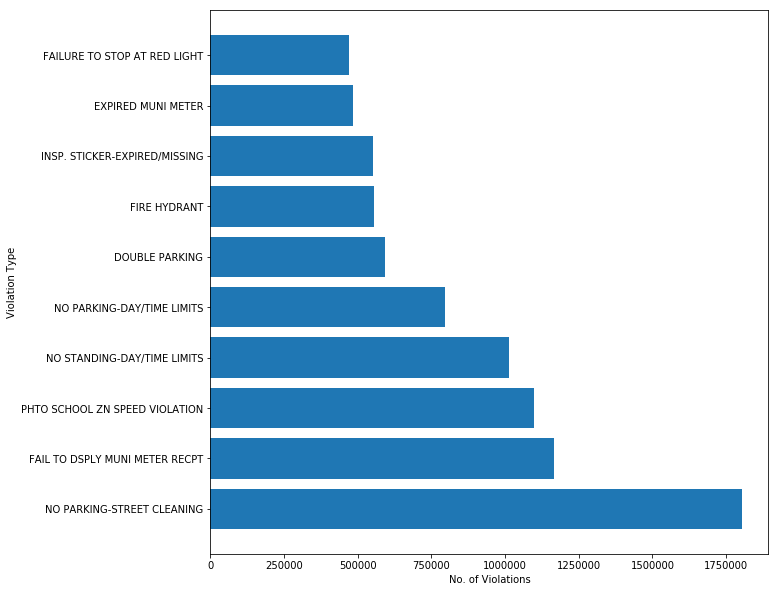

In [9]:
#plotting the data
x = top10_viol_idx.copy()
y = temp_violation_count[0:10].copy()
x_desc = []

for i in range(10):
    x_desc.append(codes_desc[top10_viol_idx[i]])

plt.rcParams['figure.figsize'] = [10, 10]
y_pos = np.arange(len(y))
plt.barh(y_pos, y)
plt.yticks(y_pos, x_desc)
plt.ylabel("Violation Type")
plt.xlabel("No. of Violations")
plt.show()

##This following graph shows the top 10 violations in NYC.